In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wind_turbine.csv')
print(df.head())

             timestamp  ...     Target
0  2021-02-19 20:18:00  ...  47.582787
1  2021-04-27 04:55:00  ...  46.070328
2  2021-01-25 06:26:00  ...  39.989236
3  2021-10-30 03:47:00  ...  46.056587
4  2021-03-15 00:39:00  ...  54.346095

[5 rows x 16 columns]


In [3]:
df.shape

(909604, 16)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  str    
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          909604 non-null

In [5]:
df.describe()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
count,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000,909604.000000
mean,525.886061,537.639468,25.573921,931.130882,60.730112,527.579537,31.755823,31.686413,111.080610,133.692333,199.487161,5.894950,0.651916,46.328595
std,474.619576,482.394907,8.025649,193.674384,9.721582,472.656976,3.929794,3.554426,78.219944,91.232152,104.617261,1.977684,0.317513,2.617691
min,0.000000,0.000008,5.616541,0.000000,25.636366,0.000000,11.141922,16.010218,-318.393721,-5.461607,0.309692,0.904500,0.000000,25.865320
25%,149.620898,155.813244,17.093680,770.538574,54.916767,147.181552,29.913803,30.267423,81.540850,96.045765,98.916060,4.400753,0.432129,44.816740
50%,379.989929,383.985926,27.919035,884.068502,60.034490,391.303187,31.762946,31.961610,92.005826,107.633378,232.821159,5.637207,0.583863,46.302899
75%,781.357475,800.261108,32.171696,1123.335856,65.737187,794.875710,33.469745,33.546260,124.879153,154.153730,287.667503,7.092771,0.798240,47.733105
max,1999.999858,1999.984456,48.089017,1267.140625,129.846405,1999.991455,52.790030,48.406106,523.892695,592.815938,359.455531,19.795001,9.534769,65.037689


In [6]:
df.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

<Axes: >

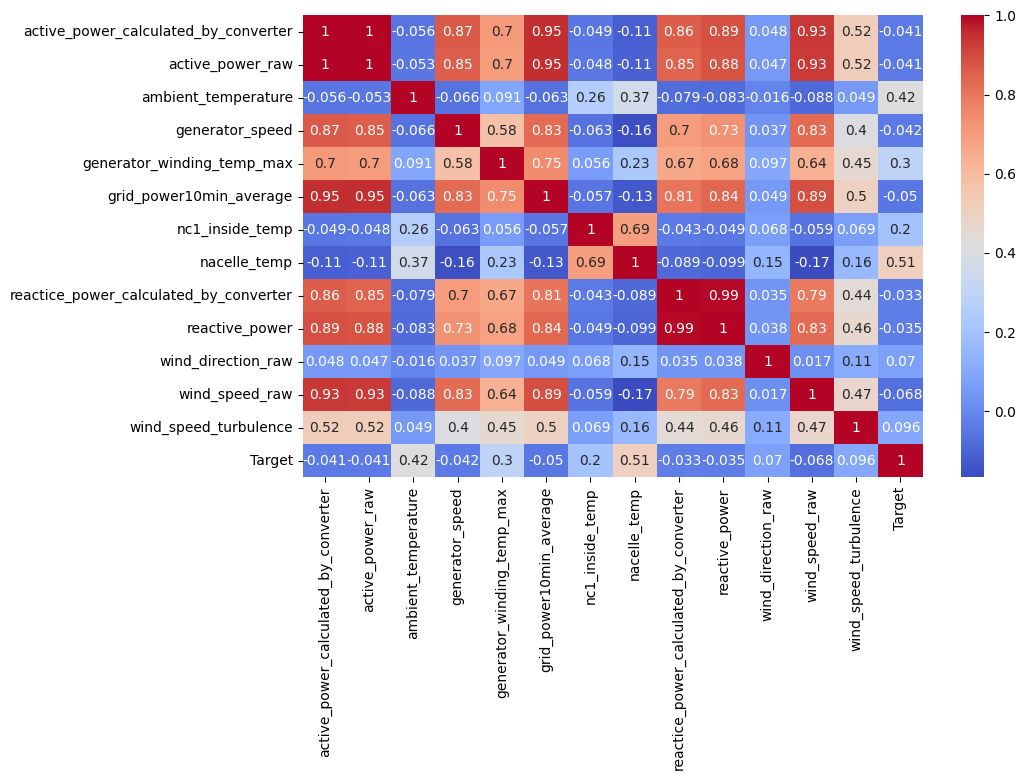

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [9]:
print(pd.to_datetime(df['timestamp'][0]))

2021-02-19 20:18:00


In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
x = df.drop(columns=['timestamp'])
print(x.info())

<class 'pandas.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   active_power_calculated_by_converter    909604 non-null  float64
 1   active_power_raw                        909604 non-null  float64
 2   ambient_temperature                     909604 non-null  float64
 3   generator_speed                         909604 non-null  float64
 4   generator_winding_temp_max              909604 non-null  float64
 5   grid_power10min_average                 909604 non-null  float64
 6   nc1_inside_temp                         909604 non-null  float64
 7   nacelle_temp                            909604 non-null  float64
 8   reactice_power_calculated_by_converter  909604 non-null  float64
 9   reactive_power                          909604 non-null  float64
 10  wind_direction_raw                      909604 non-null

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['turbine_id'] = le.fit_transform(df['turbine_id'])

df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,year,month,day,hour
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,4,47.582787,2021,2,19,20
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,12,46.070328,2021,4,27,4
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,3,39.989236,2021,1,25,6
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,10,46.056587,2021,10,30,3
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,0,54.346095,2021,3,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,7,50.768675,2021,4,25,19
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,11,44.234821,2021,2,20,17
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,10,46.942486,2021,10,22,14
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,15,46.392221,2021,2,8,22


In [12]:
print(f'First Row year: {df["year"][0]}, month: {df["month"][0]}, day: {df["day"][0]}, hour: {df["hour"][0]}')

First Row year: 2021, month: 2, day: 19, hour: 20


<Axes: >

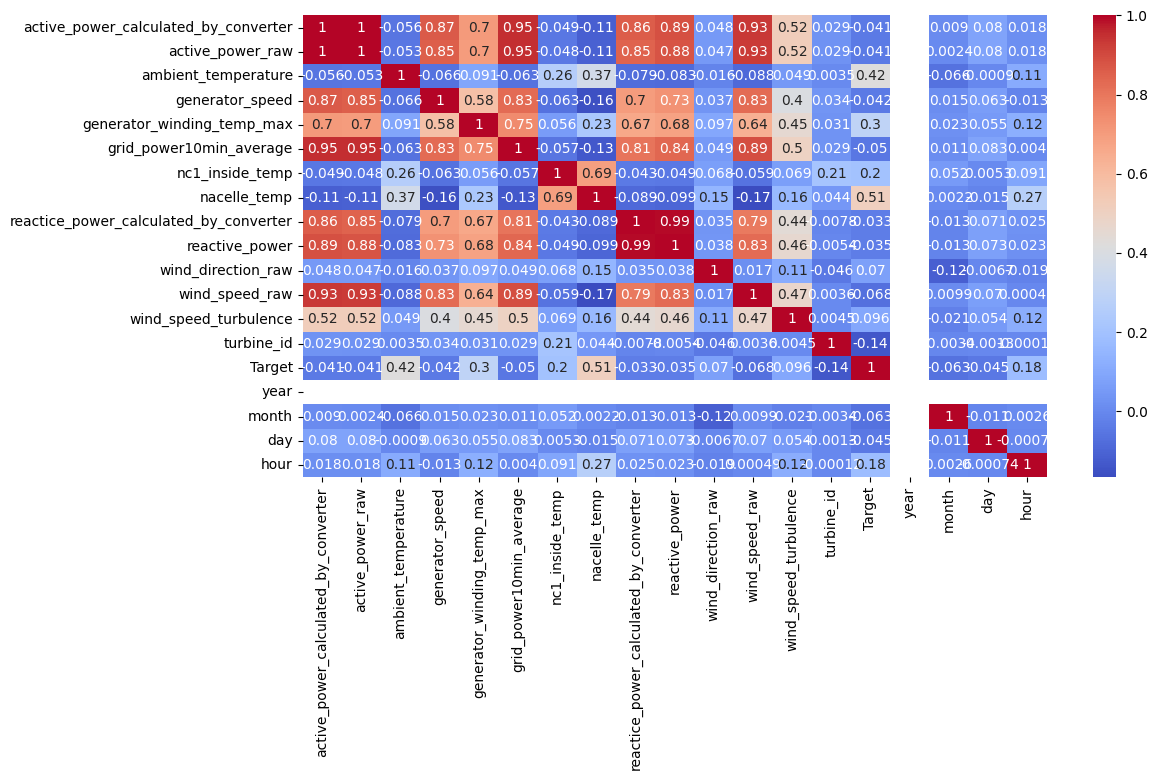

In [38]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [13]:
scaler = StandardScaler()
x = df.drop(columns=['Target','timestamp'])
y = df['Target']
x_scaled = scaler.fit_transform(x)
print(x_scaled)

[[ 0.61259769  0.61625423  0.76261266 ... -1.35097545  0.37721396
   1.22479532]
 [-0.22497659 -0.24168717 -1.57980742 ... -0.76296349  1.28248129
  -1.0516059 ]
 [ 1.63845944  1.65824121 -1.11212664 ... -1.64498143  1.05616446
  -0.76705574]
 ...
 [ 1.2536993   1.30054811  0.66377317 ...  1.00107238  0.71668921
   0.37114486]
 [-0.84792482 -0.87391632  0.88765591 ... -1.35097545 -0.86752861
   1.50934547]
 [-1.09781228 -1.09217576 -0.76273021 ... -0.76296349 -0.7543702
   0.37114486]]


In [14]:
x = pd.DataFrame(x_scaled, columns=x.columns)
x

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,year,month,day,hour
0,0.612598,0.616254,0.762613,1.179742,0.537372,0.825795,0.032101,-0.051119,0.388354,0.348662,0.777861,0.587582,-0.339620,-0.771036,0.0,-1.350975,0.377214,1.224795
1,-0.224977,-0.241687,-1.579807,-0.012304,-0.119198,-0.173541,0.169953,0.300852,-0.279905,-0.217655,0.956490,-0.212376,-0.575990,0.971123,0.0,-0.762963,1.282481,-1.051606
2,1.638459,1.658241,-1.112127,1.394552,0.055586,1.771130,-5.167951,-3.756847,1.528277,1.619604,-1.094725,1.111153,-0.093217,-0.988806,0.0,-1.644981,1.056164,-0.767056
3,-0.978450,-1.003656,0.350653,-0.832969,-2.063016,-1.085893,0.635500,0.274721,-0.573634,-0.643138,-1.072730,-0.922250,0.342674,0.535583,0.0,1.001072,1.621957,-1.193881
4,0.142490,0.153442,0.740826,0.597838,0.371509,0.151147,0.165343,-0.061902,0.333462,0.290578,1.091959,0.234109,-0.963259,-1.642115,0.0,-1.056969,-0.075420,-1.620706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,0.849556,0.851590,0.892409,1.322697,2.310019,1.725864,0.136284,0.975085,0.525900,0.629126,-0.091623,0.637308,1.187492,-0.117726,0.0,-0.762963,1.056164,1.082520
909600,-0.895782,-0.930659,0.618839,-0.830700,-0.462334,-0.740408,-0.336283,-0.493546,-0.328912,-0.406333,-1.013883,-0.896677,-0.176502,0.753353,0.0,-1.350975,0.490372,0.797970
909601,1.253699,1.300548,0.663773,1.235714,0.227621,0.731683,-0.321647,0.393524,-0.872673,-0.653072,0.301110,1.343350,0.942718,0.535583,0.0,1.001072,0.716689,0.371145
909602,-0.847925,-0.873916,0.887656,-0.830983,-0.358471,-0.913377,0.148354,-0.045304,-0.313622,-0.397024,-1.281609,-0.794306,-1.274218,1.624432,0.0,-1.350975,-0.867529,1.509345


In [15]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 20 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[us]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converter  909604 n

In [16]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=x.copy()
vif=pd.DataFrame()
vif['Features']=data.columns
vif_values=[]
vif['VIF']=0
for i in range(len(data.columns)):
    v = variance_inflation_factor(data.values, i)
    vif_values.append(v)
vif['VIF']=vif_values
print(vif)

c:\Users\nimba\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                  Features         VIF
0     active_power_calculated_by_converter  194.329916
1                         active_power_raw  164.938631
2                      ambient_temperature    1.189181
3                          generator_speed    4.552707
4               generator_winding_temp_max    3.638174
5                  grid_power10min_average   14.097798
6                          nc1_inside_temp    2.419274
7                             nacelle_temp    3.529111
8   reactice_power_calculated_by_converter  109.061401
9                           reactive_power  136.231318
10                      wind_direction_raw    1.068779
11                          wind_speed_raw    8.703340
12                   wind_speed_turbulence    1.504894
13                              turbine_id    1.095012
14                                    year         NaN
15                                   month    1.043058
16                                     day    1.008688
17        

In [17]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=x.drop(columns=['active_power_calculated_by_converter'])
vif=pd.DataFrame()
vif['Features']=data.columns
vif_values=[]
vif['VIF']=0
for i in range(len(data.columns)):
    v = variance_inflation_factor(data.values, i)
    vif_values.append(v)
vif['VIF']=vif_values
print(vif)

c:\Users\nimba\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                  Features         VIF
0                         active_power_raw   22.453592
1                      ambient_temperature    1.188755
2                          generator_speed    4.088613
3               generator_winding_temp_max    3.638064
4                  grid_power10min_average   13.945129
5                          nc1_inside_temp    2.418090
6                             nacelle_temp    3.528320
7   reactice_power_calculated_by_converter  106.649532
8                           reactive_power  135.573169
9                       wind_direction_raw    1.067642
10                          wind_speed_raw    8.538003
11                   wind_speed_turbulence    1.504414
12                              turbine_id    1.093057
13                                    year         NaN
14                                   month    1.033828
15                                     day    1.008556
16                                    hour    1.113473


In [18]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=x.drop(columns=['reactive_power','active_power_calculated_by_converter'])
vif=pd.DataFrame()
vif['Features']=data.columns
vif_values=[]
vif['VIF']=0
for i in range(len(data.columns)):
    v = variance_inflation_factor(data.values, i)
    vif_values.append(v)
vif['VIF']=vif_values
print(vif)

c:\Users\nimba\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                  Features        VIF
0                         active_power_raw  20.750273
1                      ambient_temperature   1.185599
2                          generator_speed   3.962195
3               generator_winding_temp_max   3.627970
4                  grid_power10min_average  13.943719
5                          nc1_inside_temp   2.417932
6                             nacelle_temp   3.525928
7   reactice_power_calculated_by_converter   3.823600
8                       wind_direction_raw   1.067307
9                           wind_speed_raw   8.191332
10                   wind_speed_turbulence   1.504351
11                              turbine_id   1.092957
12                                    year        NaN
13                                   month   1.033207
14                                     day   1.008555
15                                    hour   1.113444


In [19]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=x.drop(columns=['reactive_power','active_power_calculated_by_converter','active_power_raw'])
vif=pd.DataFrame()
vif['Features']=data.columns
vif_values=[]
vif['VIF']=0
for i in range(len(data.columns)):
    v = variance_inflation_factor(data.values, i)
    vif_values.append(v)
vif['VIF']=vif_values
print(vif)

c:\Users\nimba\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                  Features       VIF
0                      ambient_temperature  1.180773
1                          generator_speed  3.717205
2               generator_winding_temp_max  3.531785
3                  grid_power10min_average  8.883322
4                          nc1_inside_temp  2.380472
5                             nacelle_temp  3.426558
6   reactice_power_calculated_by_converter  3.259165
7                       wind_direction_raw  1.066810
8                           wind_speed_raw  6.235303
9                    wind_speed_turbulence  1.481360
10                              turbine_id  1.085885
11                                    year       NaN
12                                   month  1.033203
13                                     day  1.008489
14                                    hour  1.113394


In [20]:
# vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

data=x.drop(columns=['reactive_power','active_power_calculated_by_converter','active_power_raw','grid_power10min_average'])
vif=pd.DataFrame()
vif['Features']=data.columns
vif_values=[]
vif['VIF']=0
for i in range(len(data.columns)):
    v = variance_inflation_factor(data.values, i)
    vif_values.append(v)
vif['VIF']=vif_values
print(vif)

c:\Users\nimba\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                                  Features       VIF
0                      ambient_temperature  1.180721
1                          generator_speed  3.331779
2               generator_winding_temp_max  2.667091
3                          nc1_inside_temp  2.340429
4                             nacelle_temp  3.210105
5   reactice_power_calculated_by_converter  3.143542
6                       wind_direction_raw  1.065390
7                           wind_speed_raw  4.949040
8                    wind_speed_turbulence  1.448642
9                               turbine_id  1.085628
10                                    year       NaN
11                                   month  1.033183
12                                     day  1.007121
13                                    hour  1.113136


In [21]:
data.drop(columns=["year"])
data.shape

(909604, 14)

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(727683, 14)
(181921, 14)
(727683,)
(181921,)


In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R^2 Score: 0.4300227168360856
Mean Squared Error: 3.892334990597349


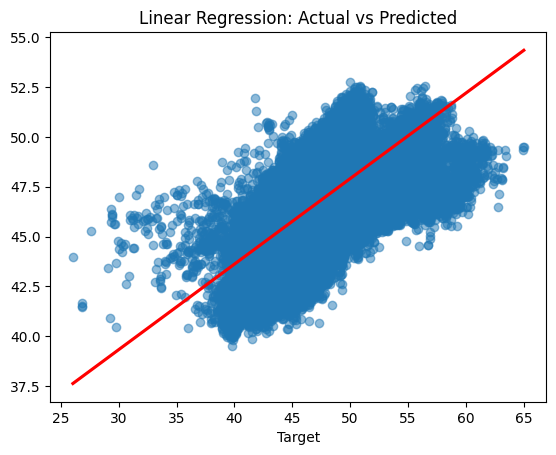

In [34]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [35]:
# decision tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: 0.9417470203902666
Mean Squared Error: 0.3978055223234456
Root Mean Squared Error: 0.6307182590693293


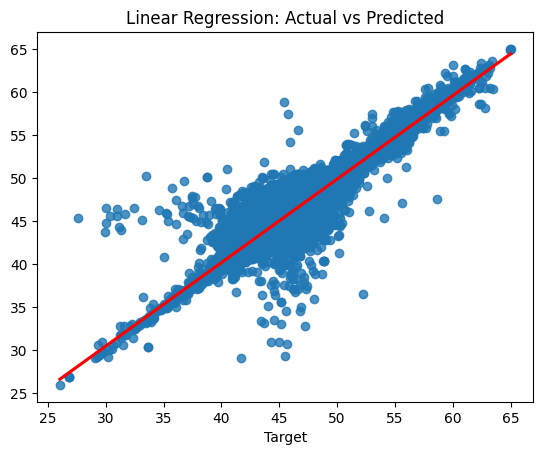

In [36]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}, scatter_kws={"alpha": 0.5})
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

In [25]:
# SVR
# from sklearn.svm import SVR

# model = SVR()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print("R^2 Score:", r2_score(y_test, y_pred))
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

In [1]:
# # Random Forest
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print("R^2 Score:", r2_score(y_test, y_pred))
# print("Mean Squared Error:", mean_squared_error(y_test, y_pred))